   # BIOS 534 homework1

#### 1.

We have two class-specific densities. Both are two-dimensional normal.

class 1:$$\mu=\left( \begin{array}{c}2\\2\end{array}  \right)~~~~\Sigma= \begin{pmatrix}1/2&0\\0&1/2\end{pmatrix}$$

class 2:$$\mu=\left( \begin{array}{c}1\\1\end{array}  \right)~~~~\Sigma= \begin{pmatrix}1&-1/2\\-1/2&1\end{pmatrix}$$

$P(\omega_1)=1/2$  

Miss-classification loss: $\begin{pmatrix}0&1\\1&0\end{pmatrix}$

(1)
For the following points, calculate $P(\omega_1 \mid x)$ 
$$x_1=\left( \begin{array}{c}1\\0\end{array}  \right)~~~~x_2=\left( \begin{array}{c} 3\\3\end{array} \right)$$  

In [36]:
from scipy.stats import multivariate_normal
w1 = multivariate_normal(mu1, sigma1)
w2 = multivariate_normal(mu2, sigma2)
mu1 = [2,2]
mu2 = [1,1]
sigma1 = [[0.5,0],[0,0.5]]
sigma2 = [[1,-0.5],[-0.5,1]]
pw1 = 1/2
pw2 = 1 - pw1
x1 = [1,0]
x2 = [3,3]
# p(w1|x) = p(x|wi)p(wi)/sum(p(x|wi)p(wi)) 
p_w1_x1 = w1.pdf(x1)*pw1/(w1.pdf(x1)*pw1+w2.pdf(x1)*pw2)
p_w1_x2 = w1.pdf(x2)*pw1/(w1.pdf(x2)*pw1+w2.pdf(x2)*pw2)
print('p(w1|x1) = %f'%p_w1_x1)
print('p(w1|x2) = %f'%p_w1_x2)

p(w1|x1) = 0.022226
p(w1|x2) = 0.998571


(2)	Use the Bayes decision theory, find and plot the optimal decision boundary.

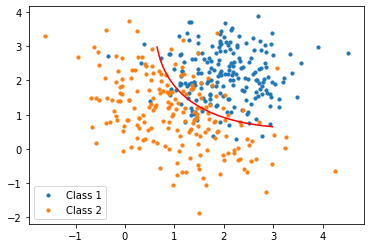

In [35]:
import matplotlib.pyplot as plt
import numpy as np

w1_samp = np.random.multivariate_normal(mu1, sigma1, 200)
w2_samp = np.random.multivariate_normal(mu2, sigma2, 200)

mu_vec1 = np.array([[2],[2]])
cov_mat1 = np.array([[0.5,0],[0,0.5]])
mu_vec2 = np.array([[1],[1]])
cov_mat2 = np.array([[1,-0.5],[-0.5,1]])


W1= (-1/2) * np.linalg.inv(cov_mat1)
W1
w1=np.linalg.inv(cov_mat1).dot(mu_vec1)
w1
w10=(((-1/2) * (mu_vec1).T).dot(np.linalg.inv(cov_mat1))).dot(mu_vec1) + (-1/2) * np.log(np.linalg.det(cov_mat1)) + np.log(pw1)
w10

W2= (-1/2) * np.linalg.inv(cov_mat2)
W2
w2=np.linalg.inv(cov_mat1).dot(mu_vec2)
w2
w20=(((-1/2) * (mu_vec2).T).dot(np.linalg.inv(cov_mat2))).dot(mu_vec2) + (-1/2) * np.log(np.linalg.det(cov_mat2)) + np.log(pw2)
w20


x_vec = np.linspace(0,3,200)
y_vec = np.linspace(0,3,200)
X,Y = np.meshgrid(x_vec,y_vec)
X_vec = np.array([[X],[Y]])
#Let X=(x,y).T
#g1x=X.T*W1*X+w1X-w10
#g2x=X.T*W2*X+w2X-w20
#g1x=g2x --> -1/3(x^2+y^2)+2/3xy+2(x+y)-5.4507=0
bound=-1/3*X**2-1/3*Y**2+(2/3*X*Y)+2*X+2*Y-5.4507
plt.scatter(*w1_samp.T,s=10,label="Class 1")
plt.scatter(*w2_samp.T,s=10,label="Class 2")
plt.contour(X, Y, bound,colors='r',levels=[0])
plt.legend(loc=3)
plt.show()

#### 2.

Download the training and testing data from CANVAS. The files are “dat.train.txt“ and “dat.test.txt”.  The data files are tab-delimited text files. They contain two X variables and one Y variable (two classes). 

Code a function for the K-nearest neighbor classifier.  The input of the function should contain the training data and K. Please do not use the built-in KNN classifier. 

Classify the data points in the testing data using three settings: (a) K=1, (b) K=5, (c) K=15. 

For each setting, consider class “1” as disease cases and “0” as healthy controls. Calculate the sensitivity and specificity. See definition here

https://en.wikipedia.org/wiki/Sensitivity_and_specificity

Plot the testing data. Use different shape to show the true class labels, and color the misclassified points.  


When k=1, 
sensitivity = 0.890909,
specificity=0.844444 



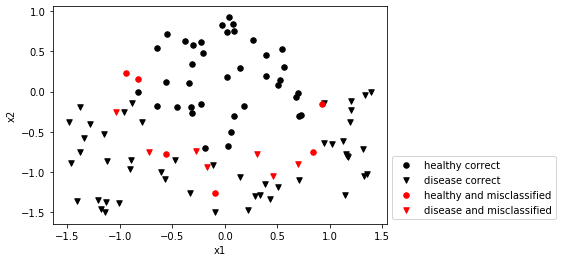

When k=5, 
sensitivity = 0.818182,
specificity=0.888889 



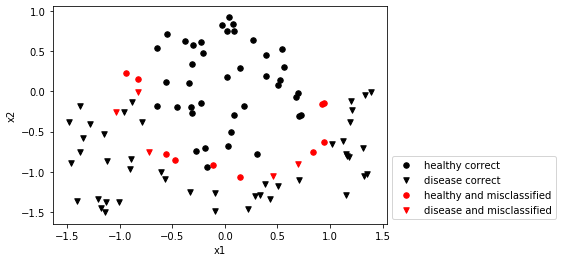

When k=10, 
sensitivity = 0.890909,
specificity=0.866667 



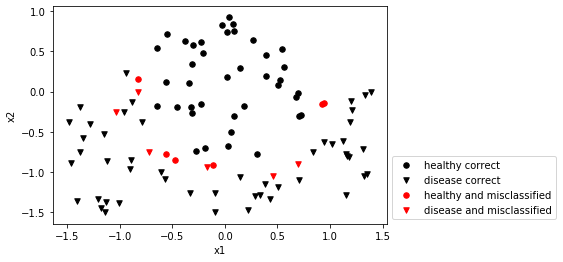

In [82]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#calculate distance between testing point and train point
def euclideanDistance(x,y):
    distance = math.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2) 
    return distance

def kNeighbors(X,x,y,K):
    s = x.shape[0]
    S = X.shape[0]
    pred_Y = np.zeros((S,1))
    for i in range(S):
        d = np.zeros((s,1))
        for j in range(s):
            d[j] = euclideanDistance(X[i,:],x[j,:]) #distance for all the points respect with one point i in testing file
        index = np.argsort(d,axis = 0)     #sort according to the distance and index include index of distance 
        classvotes = 0                          
        for k in range(K):    #find k nearest points in training respect to testing i
            response = y[index[k]] #find the class of testing point i with its index
            if response == 0:      
                classvotes += 1    
        if classvotes > K/2:     #if the nearest test points are in class 0, and more than half of these points are in 
            pred_y = 0         # class 0, the i training point is ->predict into class 0
        else:
            pred_y = 1         # else ->predict into class 1
        pred_Y[i] = pred_y      #build the new class of traiing points after classfied
        
    return pred_Y

def misclassified_point(X,Y,pred_Y):
    mis_0 = []
    mis_1 = []
    right_0 = []
    right_1 = []
    s = Y.shape[0]
    for i in range(s):
        if (Y[i] != pred_Y[i] and pred_Y[i] == 0):   #find original class 1 training point -> predict class 0
            mis_0.append(X[i,:])
        elif (Y[i] != pred_Y[i] and pred_Y[i] == 1): #find original class 0 training point -> predict class 1
            mis_1.append(X[i,:])
        elif (Y[i] == pred_Y[i] and pred_Y[i] == 0): #find original class 0 training point -> predict class 0
            right_0.append(X[i,:])                 
        else:
            right_1.append(X[i,:])                   #find original class 1 training point -> predict class 1
    mis_0 = np.matrix(mis_0)
    right_0 = np.matrix(right_0)
    mis_1 = np.matrix(mis_1)
    right_1 = np.matrix(right_1)
    return mis_0,mis_1,right_0,right_1

def plot(X,Y,x,y,K):
    new_Y = kNeighbors(X,x,y,K)
    
    #mis points
    mis_0,mis_1,right_0,right_1 = misclassified_point(X,Y,new_Y)
    
    
    plt.scatter([right_0[:,0]],[right_0[:,1]],30,
            color='black', marker='o', label='healthy correct')
    plt.scatter([right_1[:,0]],[right_1[:,1]],30,
            color='black', marker='v', label='disease correct')
    plt.scatter([mis_0[:,0]],[mis_0[:,1]],30,
            color='red', marker='o', label='healthy and misclassified')
    plt.scatter([mis_1[:,0]],[mis_1[:,1]],30,
            color='red', marker='v', label='disease and misclassified')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=0.5)
    plt.show()

def parameters(X,Y,x,y,K):
    pred_Y = kNeighbors(X,x,y,K)
    right0 = [] #True Negtive, TN
    right1 = [] #True Positive, TP
    mis0 = [] #class 0 -> predict class 1 #False Negtive, FN
    mis1 = [] #class 1 -> predict class 0 #False Positive, FP

    for i in range(Y.shape[0]):
        if np.allclose(pred_Y[i],0):
            if np.allclose(pred_Y[i],Y[i]): 
                right0.append(pred_Y[i])
            else:
                mis0.append(pred_Y[i])
        else:
            if np.allclose(pred_Y[i],Y[i]):
                right1.append(pred_Y[i])
            else:
                mis1.append(pred_Y[i])
    TN = len(right0)
    TP = len(right1)
    FN = len(mis0)
    FP = len(mis1)
    sensitivity = TP / float((TP + FN)) 
    specificity = TN / float((TN + FP))
    
    print('When k={:d}, \nsensitivity = {:f},\nspecificity={:f} \n'.format(K,sensitivity,specificity))

#read data
f1 = pd.read_csv('/Users/mengjiawei/Desktop/534/hw1/dat.train.txt',sep='\t', header = None, skiprows = 1)
f2 = pd.read_csv('/Users/mengjiawei/Desktop/534/hw1/dat.test.txt',sep='\t', header = None, skiprows = 1)

#read testing data
X = f2.loc[:,[0,1]].values
Y = f2.loc[:,[2]].values

#read traing data
x = f1.loc[:,[0,1]].values
y = f1.loc[:,[2]].values

#parameters,k=1
parameters(X,Y,x,y,1)
#plot,k=1
plot(X,Y,x,y,1)

#k=5
parameters(X,Y,x,y,5)
plot(X,Y,x,y,5)

#k=10
parameters(X,Y,x,y,10)
plot(X,Y,x,y,10)


#### 3.

Given the following data points:

	x= -9, -8, -7, -6, -5, -4-3 -2 -1 0 1 2 3 4…, 5, 6, 7, 8, 9
	y= sin(x/2)

Generate the basis for a cubic spline, with knots at -3 and 3. Paste the new design matrix in the submission. 

Do a simple linear regression of y against the cubic spline basis. Plot the original data points, and show the fitted data points in another color. 


[[1, -9, 81, -729, 0, 0], [1, -8, 64, -512, 0, 0], [1, -7, 49, -343, 0, 0], [1, -6, 36, -216, 0, 0], [1, -5, 25, -125, 0, 0], [1, -4, 16, -64, 0, 0], [1, -3, 9, -27, 0, 0], [1, -2, 4, -8, 1, 0], [1, -1, 1, -1, 8, 0], [1, 0, 0, 0, 27, 0], [1, 1, 1, 1, 64, 0], [1, 2, 4, 8, 125, 0], [1, 3, 9, 27, 216, 0], [1, 4, 16, 64, 343, 1], [1, 5, 25, 125, 512, 8], [1, 6, 36, 216, 729, 27], [1, 7, 49, 343, 1000, 64], [1, 8, 64, 512, 1331, 125], [1, 9, 81, 729, 1728, 216]]


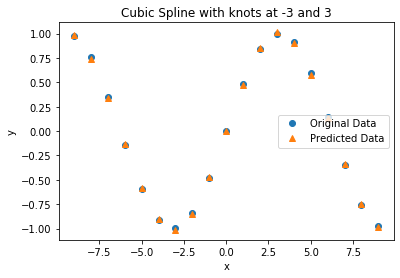

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Xi1 = -3
Xi2 = 3
x = []
y_true = []
x=np.arange(-9,10)
y_true=np.sin(x/2)

def cubic(x_array):
    x_cubic = []
    i = 0
    while i<len(x_array):
        h = x_array[i]
        h1 = h**0
        h2 = h**1
        h3 = h**2
        h4 = h**3
        h5 = (h-Xi1)**3
        h6 = (h-Xi2)**3
        if h5 < 0:
            h5 = 0
        if h6 < 0:
            h6 = 0
        x_cubic.append([h1,h2,h3,h4,h5,h6])
        i+=1
    return x_cubic

x_c= cubic(x)
glm = LinearRegression(fit_intercept=False)
glm.fit(x_c,y_true)
y_pred=glm.predict(x_c)
print(x_c)

plt.title('Cubic Spline with knots at -3 and 3')
plt.plot(x, y_true, 'o',label='Original Data') 
plt.plot(x, y_pred, '^',label='Predicted Data') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='right')
plt.show()

#### 4.

Based on the Feb 18 lecture, page 13, once we have found the optimal $G()$, and found $$err_m=\frac{\sum_{i=1}^Nw_i^{(m)}I(y_i \ne G_m(x_i))}{\sum_{i=1}^Nw_i^{(m)}}$$ show why $$\beta_m=\frac{1}{2}log\frac{1-err_m}{err_m}$$

$$
plug\ G_m\ to\ the\ function,we\ get\ 
e^{-\beta}\sum_{y_i=G\left(x_i\right)}\omega_i^{\left(m\right)}+e^\beta\sum_{y_i\neq G\left(x_i\right)}\omega_i^{\left(m\right)}\\
The\ target\ \beta_m\ is\ the\ \beta\ which\ minimize\ this\ formula, we\ can\ get\ that\ by\ make\ the\ derivative\ of\ \beta\ equal\ to\ 0\\
e^{-\beta_m}\sum_{y_i=G\left(x_i\right)}\omega_i^{\left(m\right)}+e^{\beta_m}\sum_{y_i\neq G\left(x_i\right)}\omega_i^{\left(m\right)}\\
=\left(e^{\beta_m}-e^{-\beta_m}\right)\sum_{i=1}^N{\omega_i^{\left(m\right)}I\left(y_i\neq G_m\left(x_i\right)\right)}+e^{-\beta_m}\sum_{i=1}^N\omega_i^{\left(m\right)}\\
the\ derivative\ of\ \beta_m\ equal\ to\ 0:
\left(e^{\beta_m}+e^{-\beta_m}\right)\sum_{i=1}^N{\omega_i^{\left(m\right)}I\left(y_i\neq G_m\left(x_i\right)\right)}-e^{-\beta_m}\sum_{i=1}^N\omega_i^{\left(m\right)}=0\\
\left(e^{\beta_m}+e^{-\beta_m}\right)\sum_{i=1}^N{\omega_i^{\left(m\right)}I\left(y_i\neq G_m\left(x_i\right)\right)}=e^{-\beta_m}\sum_{i=1}^N\omega_i^{\left(m\right)}\\
Since\ err_m=\frac{\sum_{y_i=G\left(x_i\right)}{\omega_i^{\left(m\right)}I\left(y_i\neq G_m\left(x_i\right)\right)}}{\sum_{y_i\neq G\left(x_i\right)}\omega_i^{\left(m\right)}}\\
\left(e^{\beta_m}+e^{-\beta_m}\right)err_m=e^{-\beta_m}\\
e^{\beta_m} err_m=e^{-\beta_m}\left(1-err_m\right)\\
e^{2\beta_m}=\frac{1-err_m}{err_m} \\
2\beta_m=log\frac{1-err_m}{err_m} \\
\beta_m=\frac{1}{2}log\frac{1-err_m}{err_m}
$$

#### 5.

Write a function of Adaboost. The base learner should be a cutoff on one of the axes. The threshold can be found by greedy search over all the possible cutoffs.  

Using the same data as in question (2), Run the function on the training data with 1~100 iterations. For each of the iteration settings, conduct prediction on the testing data. Plot error rate against the number of iterations. 


[0.19]
0.26
[0.22254711]
0.26
[0.24798896]
0.2
[0.28546771]
0.26
[0.25059244]
0.09
[0.33991161]
0.09
[0.37873716]
0.09
[0.34877305]
0.09
[0.36902275]
0.09
[0.37013012]
0.09
[0.39440304]
0.09
[0.38381871]
0.09
[0.35332545]
0.09
[0.40540798]
0.09
[0.41018228]
0.09
[0.38659235]
0.11
[0.40755931]
0.09
[0.39107798]
0.11
[0.4105616]
0.09
[0.38670412]
0.11
[0.40349761]
0.09
[0.41146275]
0.09
[0.39909245]
0.09
[0.42182231]
0.09
[0.40436427]
0.09
[0.41971962]
0.09
[0.42077676]
0.09
[0.42756468]
0.11
[0.40686232]
0.09
[0.43016285]
0.11
[0.41792381]
0.09
[0.434212]
0.1
[0.44186162]
0.09
[0.43267624]
0.1
[0.44114663]
0.09
[0.44093305]
0.1
[0.41563789]
0.09
[0.41960951]
0.1
[0.43074448]
0.09
[0.42461799]
0.1
[0.43449395]
0.09
[0.42135954]
0.1
[0.43515782]
0.1
[0.39894306]
0.1
[0.4193986]
0.09
[0.42945469]
0.09
[0.42378005]
0.1
[0.4290608]
0.1
[0.43520394]
0.1
[0.42055438]
0.1
[0.43738616]
0.1
[0.42539696]
0.09
[0.42901089]
0.1
[0.432646]
0.09
[0.42198064]
0.1
[0.43251146]
0.09
[0.4286879]
0.1
[0.43

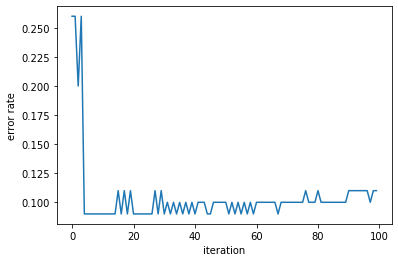

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#define functions of classifier
def classify(value,x,label):
    if (label == 0):
        if (x <= value):
            y_pred = -1      
        else:
            y_pred = 1
    elif (label == 1):
        if (x <= value):
            y_pred = 1      
        else:
            y_pred = -1
           
    return y_pred

#Classify all training data with one weak classfier (xij)(loop all training data with specific xij)
def Weighterror(value,X,Y,W,label):
    weighterror = 0
    for i, x in enumerate(X):
        y_p = classify(value,x,label)   
        y_dot = y_p*Y[i]
        
        if (y_dot <= 0):      
            weighterror += W[i]
           
    return weighterror

#The sum of weight
def Sumweight(W):
    sumweight = 0
    for i, w in enumerate(W):
        sumweight += W[i]
    return sumweight

#new weight after iteration
def changeweight(value,X_line,Y,W,label,a):
    for i,x in enumerate(X_line):
        y_p = classify(value,X_line[i],label)
        y_dot = y_p*Y[i]
        
        if (y_dot <= 0): 
            W[i] = W[i]*np.exp(a)
            
        else:
            continue
    return W

#Find the best xij to classify traning data (loop for every possible xij)
def Buildline(X,Y,W):
    weight_x1_l = []
    weight_x1_r = []
    weight_x2_l = []
    weight_x2_r = []
    weight_x = []
    x_best = []
    X_list = []
    
    X1 = X[:,0] 
    X2 = X[:,1] 
    
    X_list.append(X1)
    X_list.append(X1)
    X_list.append(X2)
    X_list.append(X2) 
    #X_list = [[X1],[X1],[X2],[X2]]

    for i, x1 in enumerate(X1):
        weighterror1_l = Weighterror(X1[i],X1,Y,W,0) #weighterror of X1,left
        weight_x1_l.append(weighterror1_l)
        
        weighterror1_r = Weighterror(X1[i],X1,Y,W,1) #weighterror of X1,right
        weight_x1_r.append(weighterror1_r) 
    
    weight_x.append(weight_x1_l) #put (l,x1) in list, index = 0
    weight_x.append(weight_x1_r) #put (r,x1) in list, index = 1
    
    
    for i, x2 in enumerate(X2):
        weighterror2_l = Weighterror(X2[i],X2,Y,W,0) #weighterror of X2,left
        weight_x2_l.append(weighterror2_l)
        weighterror2_r = Weighterror(X2[i],X2,Y,W,1) #weighterror of X2,right
        weight_x2_r.append(weighterror2_r)
    
    
    weight_x.append(weight_x2_l) #put (l,x2) in list, index = 2
    weight_x.append(weight_x2_r) #put (r,x2) in list, index = 3
                                 #weight_x = [[weight_x1_l], [weight_x1_r], [weight_x2_l], [weight_x2_r]]
    
    weight_x_min_list = np.min(weight_x, axis=1) #minimum of every (l/r,x1/x2) list 
                                                #weight_x_min_list = [min(weight_x1_l),min(weight_x1_r),min(weight_x2_l),min(weight_x2_r)]
    
    weight_x_min = min(weight_x_min_list)#minimum in all list, smallest weighterror

    index_list = np.argmin(weight_x_min_list) #index of four lists who has the smallest weighterror
                                             #index_list = the index in weight_x_min_list
                                             #= the index in weight_x = best value with smallest weighterror in which list, (l/r,x1/x2),between 0 and 3   

    label_list = [[0,0],[1,0],[0,1],[1,1]] #build label list to represent all (l/r,x1/x2)
                                           #label_list = [[l,X1],[r,X1],[l,X2],[r,X2]]
    label = label_list[index_list] #find the label(0 or 1) of smallest weighterror
    
    index = weight_x[index_list].index(weight_x_min)#index of best value,0-69

    best_value = X_list[index_list][index]
    
    x_best.append(best_value)
    x_best.append(label) 
    #x_best = [best value,[l(0)/r(1),X1(0)/X2(1)]
    #best value = x_best[0], l/r = x_best[1][0],X1/X2 = x_best[1][1]
    
    return x_best

#combination of weak classifier
def AdaClassify(alpha,value_best,x_test):
    value, label_index = value_best[0],value_best[1][0]  #value, label_index = best value, l/r
    y_testp = classify(value,x_test,label_index)*alpha  
               
    return y_testp

#Build Adaboost training
def Adaboost(iteration,X,Y,W,X_test,Y_test):
    error_rate = []
   
    Y_testp = np.zeros(Y_test.shape[0])
    for i in range(iteration):
        n = 0
        x_best = Buildline(X,Y,W)

        value, label_index ,line_index = x_best[0],x_best[1][0],x_best[1][1]  #value, label_index ,line_index = best value, l/r, X1/X2 
        X_line = X[:,line_index] #x1 best: X_line = X[:,0];x2 best: X_line = X[:,1];
        
        weighterror = Weighterror(value,X_line,Y,W,label_index)
        
        sumweight = Sumweight(W)
        error = weighterror/float(sumweight)  #calculate error
        print (error)

        a = np.log((1-error)/float(error))  #calculate alpha
        
        W = changeweight(value,X_line,Y,W,label_index,a) #new weight
        
        n_test = X_test.shape[0] #number of data in X_test
        for j in range(n_test):
            x_test = X_test[:,line_index][j] 
            Y_testp[j] += AdaClassify(a,x_best,x_test)
        
            y_dot = Y_testp[j] *Y_test[j]
            if (y_dot <= 0):      
                n += 1 
        error_rate.append(n/float(n_test)) #error rate of every iteration
        print (error_rate[i])
                    
    return error_rate

#read files
f1 = pd.read_csv('/Users/mengjiawei/Desktop/534/hw1/dat.train.txt',sep='\t', header = None, skiprows = 1)
f2 = pd.read_csv('/Users/mengjiawei/Desktop/534/hw1/dat.test.txt',sep='\t', header = None, skiprows = 1)

#read training data
X = f1.loc[:,[0,1]].values
Y = f1.loc[:,[2]].values
for i in range(len(Y)):
    if Y[i] == 0:
        Y[i] = -1
#read testing data
X_test = f2.loc[:,[0,1]].values
Y_test = f2.loc[:,[2]].values
for i in range(len(Y_test)):
    if Y_test[i] == 0:
        Y_test[i] = -1
#number of training data
n = X.shape[0]

#set initial weight
W = np.full((n,1),1/float(n))

#iteration
error_rate = Adaboost(100,X,Y,W,X_test,Y_test)
print (error_rate[100-1])

x_plot = list(range(100))

plt.plot(x_plot, error_rate)
plt.xlabel('iteration')
plt.ylabel('error rate')
plt.show()